<a href="https://colab.research.google.com/github/isamhitha05/GOOGLE-PLAYSTORE-DATASET/blob/main/GOOGLE%20PLAYSTORE%20DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA VISUALIZATION PORJECT**

**GROUP-7**

**DATASET** 

GOOGLE PLAY STORE

**GROUP MEMBERS:**


Samhitha.V.Gowda(20181CSE0629)

Satyam Mourya(20181CSE0643)

Sanjay B(20181CSE0636)

Sathish NP(20181CSE0642)

T.Sree Alekya (20181CSE0747)

**Column Definition:**

•	App: name of application

•	Category: category that app belongs to(ex: ART_AND_DESIGN)

•	Rating: overall user rating of the app

•	Reviews: number of user reviews for the app

•	Size: size of the app

•	Installs: number of user downloads for the app

•	Type: paid or free

•	Price: price of the app

•	Content Rating: age group the app is targeted at-children/adult/mature21+

•	Genre: beside category, multiple genres app belongs to( ex: Art & Design ; Creativity)

•	Last Updated: date when the app was last updated on play store

•	Current Ver: current version of the app available on play store

•	Android Ver: version of the app available on play store


**IMPORTING LIBRARIES** 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud , STOPWORDS
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

**MOUNTING THE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**READING THE DATASET**

In [ ]:
google = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv") 

In [ ]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
google.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**UNDERSTANDING THE DATASET**

In [ ]:
google.shape

(10841, 13)

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
google.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

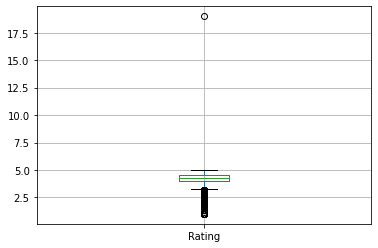

In [ ]:
google.boxplot()

In [ ]:
google[google.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
google.drop([10472],inplace=True)

In [ ]:
google[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


**BOXPLOT**

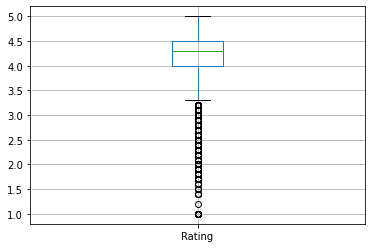

In [ ]:
google.boxplot()


**BAR CHART**

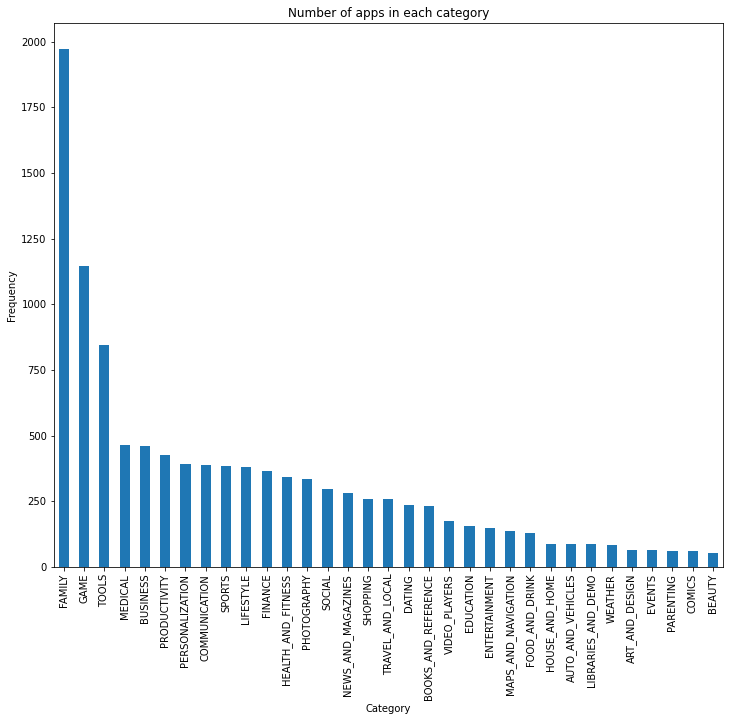

In [ ]:
google.Category.value_counts().plot(kind = 'bar', figsize = (12,10), title = 'Number of apps in each category');
plt.xlabel('Category')
plt.ylabel('Frequency');

**PIE CHART**

Text(0.5, 1.0, 'Ratio of paid apps vs free apps')

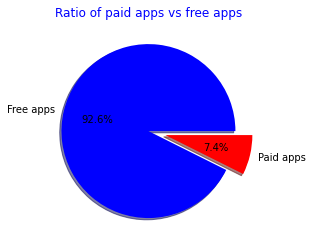

In [ ]:
fig1,ax1=plt.subplots()
ax1.pie(google.Type.value_counts(), autopct = '%1.1f%%',labels = ['Free apps','Paid apps'],colors=['blue','red'],explode=[0,0.2],shadow=True)
ax1.set_title('Ratio of paid apps vs free apps',color='blue')

**BARCHART WITH LOG FUNCTION**

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


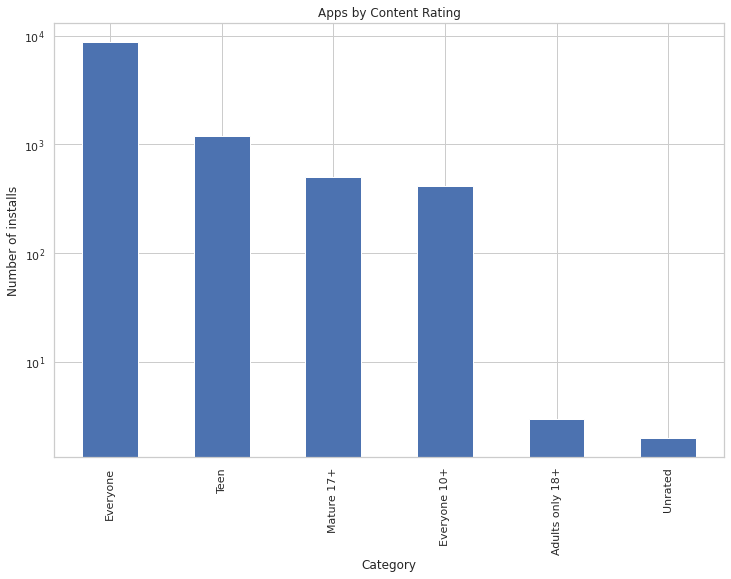

In [ ]:
sns.set_theme(style="whitegrid")
print(google['Content Rating'].unique())
google['Content Rating'].value_counts().plot(kind = 'bar', title = 'Apps by Content Rating', figsize = (12,8)) 
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.yscale('log');

**HISTOGRAM**

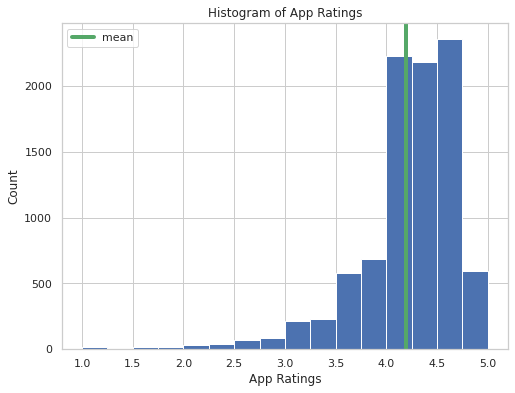

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(google.Rating, range=(1,5), bins=16)
plt.axvline(x=google.Rating.mean(), linewidth=4, color='g', label="mean")
plt.xlabel("App Ratings")
plt.ylabel("Count")
plt.title("Histogram of App Ratings")
plt.legend(["mean"])
plt.show()

**VIOLIN GRAPH**

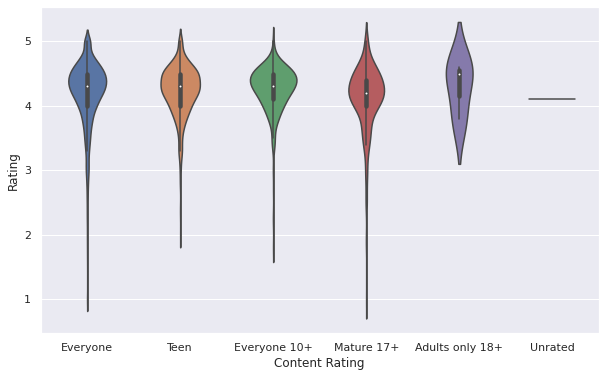

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x="Content Rating", y="Rating", data=google,width=0.5)

**BOXPLOT**

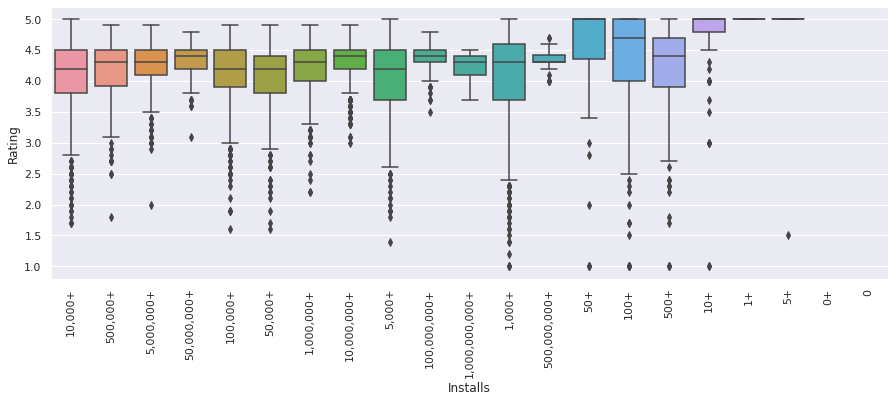

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Installs',y='Rating',data=google)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

**COUNT PLOT**

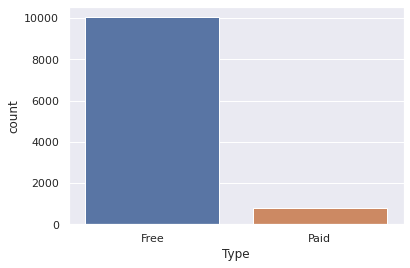

In [ ]:
sns.countplot(x='Type',data=google)
sns.set_theme(style="darkgrid")

**KDE PLOT**

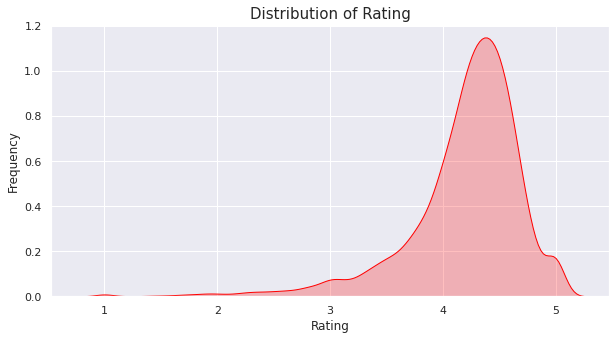

In [ ]:
plt.figure(figsize=(10,5))
g = sns.kdeplot(google.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 15)
plt.show()

**SCATTER PLOT**

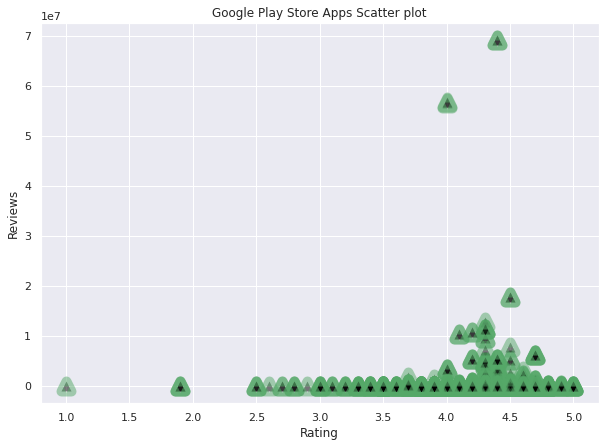

In [ ]:
google = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv",nrows = 1000)
x = google["Rating"]
y = google["Reviews"]
plt.figure(figsize = (10,7)) 
plt.scatter(x,y, c = "black", marker = "^", s = 100, alpha=0.5, linewidths=10,
           edgecolors="g" )
plt.title("Google Play Store Apps Scatter plot")
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.show()

**WORD CLOUD**

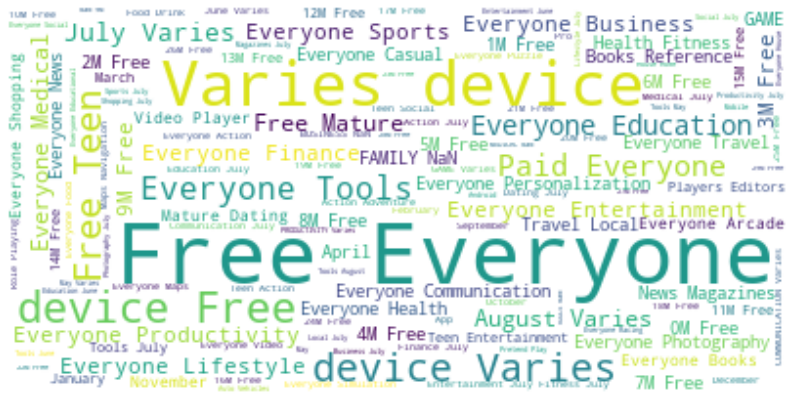

In [ ]:
google = open('/content/drive/MyDrive/googleplaystore.csv', 'r',encoding='utf-8').read()
#Remove Stop Words
google_stopwords = set(STOPWORDS)
# instantiate a word cloud object
google_wc = WordCloud(background_color='white', max_words=5000, stopwords=google_stopwords)
# generate the word cloud
google_wc.generate(google)
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
# display the cloud
plt.imshow(google_wc, interpolation='bilinear' )
plt.axis('off')
plt.show()